In [1]:
import numpy as np

from copy import deepcopy
from tqdm import tqdm
import time as t

from Mixers import *

import matplotlib.pyplot as plt

---

##### Parameters

In [10]:
d = 6               # depth for BalazsFlow
n = 2**(d+1) - 2    # side length of the box
density_init = 1e-3 # initial density

time = 3000   # number of iterations
step = 10     # how often do we save a picture

wait = 10     # time spent between pictures given in ms
dpi  = 250    # defines the quality of the figure, something like pixels per inch

transition = Swirl(n//2, diff=1/n, alternating=False)

##### Global settings

In [3]:
np.set_printoptions(precision=2)
plt.rcParams['figure.dpi'] = dpi

---

##### Setting the initial distribution

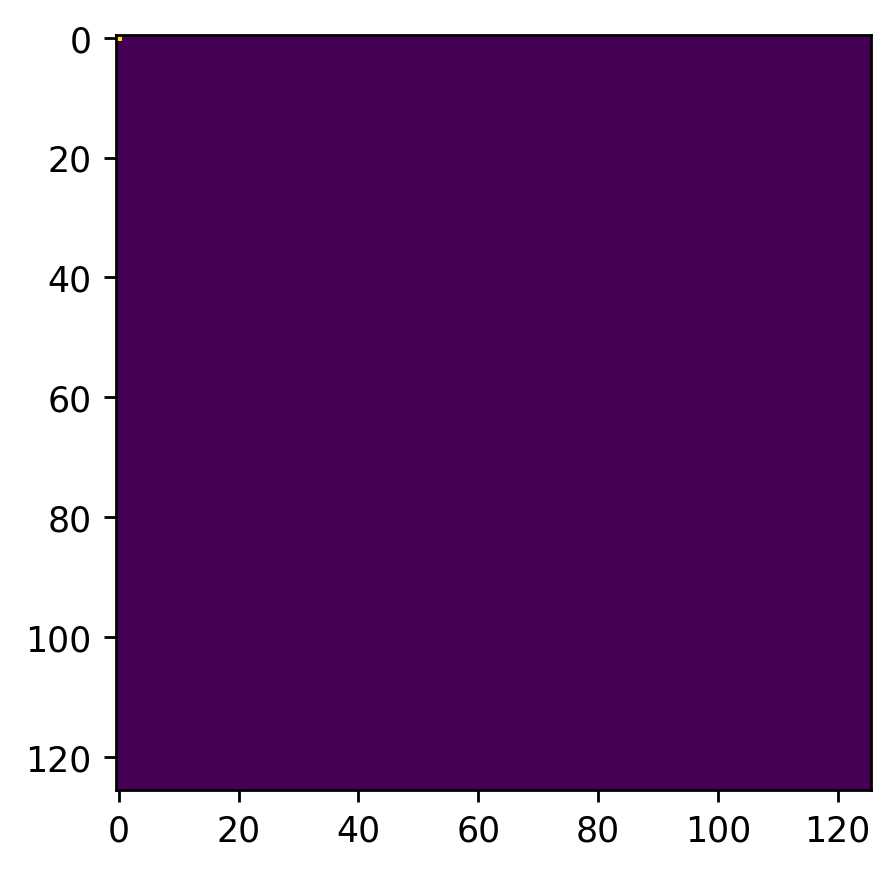

In [4]:
#di = (np.random.rand(n,n) < density_init).astype(float)
di = np.zeros([n,n])
di[0,0] = 1
init = Distribution(di)

# printing so you have aesthetic options
plt.imshow(init.dist)
plt.show()

##### Simulation & gif

Every figure is closed asap to save resources.

In [11]:
distribution = deepcopy(init)    # we want the same init for every strategy

name = f'{str(transition)}_n{n}_t{time}_s{step}'
folder_name = f'.{name}'
!mkdir $folder_name

# we save extra images of the init, so it will be visible in the gif
plt.imshow(distribution.dist)
plt.axis('off')
[plt.savefig(f'{folder_name}/{str(transition)}_0000_{j}.png', bbox_inches='tight') for j in range(4)]
plt.close()

# main iteration
for i in tqdm(np.arange(step,time,step), ncols=50):
    # advancing
    [distribution.update(transition) for _ in range(step)]

    # saving the current state
    plt.axis('off')
    plt.imshow(distribution.dist)
    plt.savefig(f'{folder_name}/{str(transition)}_{i:04}.png', bbox_inches='tight')
    plt.close()

pics = f'{folder_name}/*.png'
gif = f'gifs/{name}.gif'

now = t.time()
!convert -delay 10 -loop 0 $pics $gif
gif_run_time = t.time()-now
print(f'gif done | {gif_run_time // 60:02.0f}:{gif_run_time % 60:02.0f}')

!rm -r $folder_name

100%|███████████| 299/299 [00:42<00:00,  6.96it/s]


gif done | 01:13


---
---
---